## Day 35 Lecture 1 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing survival rates after breast cancer surgery loaded below and analyze the model generated for this dataset.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Attributes:
# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
#  -- 1 = the patient survived 5 years or longer
#  -- 2 = the patient died within 5 year

cols = ['age', 'op_year', 'nodes', 'survival']
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/haberman.data', names=cols)

In [3]:
cancer.head()

,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Check for missing data and remove all rows containing missing data

In [4]:
# answer below:
cancer.isnull().sum()


age         0
op_year     0
nodes       0
survival    0
dtype: int64

Adjust the target variable so that it has values of either 0 or 1

In [5]:
# answer below:
cancer['survival'] = np.where(cancer['survival'] == 1, 1, 0)
cancer.survival.value_counts()


1    225
0     81
Name: survival, dtype: int64

Split the data into train and test (20% in test)

In [6]:
# answer below:
from sklearn.model_selection import train_test_split

X = cancer.drop('survival', axis=1)
y = cancer['survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
from imblearn.combine import SMOTEENN

smote = SMOTEENN(sampling_strategy=1, random_state=21)

X_train_samp, y_train_samp = smote.fit_resample(X_train, y_train)

y_train_samp = pd.Series(y_train_samp, name='TenYearCHD')

scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train_samp)
X_test_scale = scaler.transform(X_test)

Create a gradient boosted classification algorithm with a learning rate of 0.01 and max depth of 5. Report the accuracy.

In [7]:
# answer below:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime

gbc = GradientBoostingClassifier(learning_rate=.01,max_depth=5)

gbc.fit(X_train, y_train)

print("Train score: ",gbc.score(X_train, y_train))
print("Test score: ",gbc.score(X_test, y_test))


Train score:  0.860655737704918
Test score:  0.7580645161290323


Print the confusion matrix for the test data. What do you notice about our predictions?

In [8]:
# answer below:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    Given a scikit-learn confusion matrix (CM), make a nice plot.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: Given classification classes, such as [0, 1, 2]
                  The class names, for example, ['high', 'medium', 'low']

    title:        The text to display at the top of the matrix

    cmap:         The gradient of the values displayed from matplotlib.pyplot.cm
                  See http://matplotlib.org/examples/color/colormaps_reference.html
                  `plt.get_cmap('jet')` or `plt.cm.Blues`

    normalize:    If `False`, plot the raw numbers
                  If `True`, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # Confusion matrix created by
                                                              # `sklearn.metrics.confusion_matrix`
                          normalize    = True,                # Show proportions
                          target_names = y_labels_vals,       # List of names of the classes
                          title        = best_estimator_name) # Title of graph

    Citation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

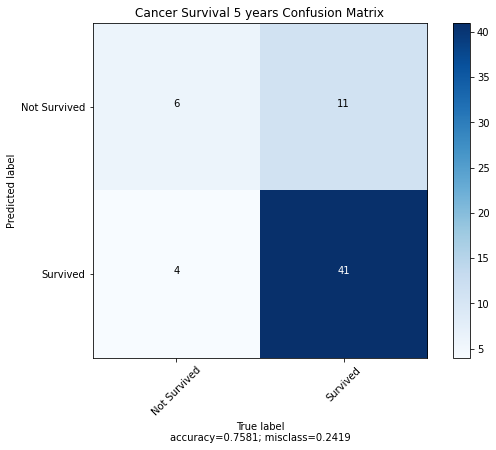

In [9]:
from sklearn.metrics import  classification_report, confusion_matrix
y_test_pred = gbc.predict(X_test)

confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['Not Survived','Survived'],
                      title = 'Cancer Survival 5 years Confusion Matrix',normalize=False)

In [10]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44        17
           1       0.79      0.91      0.85        45

    accuracy                           0.76        62
   macro avg       0.69      0.63      0.64        62
weighted avg       0.74      0.76      0.74        62



We see some overfitting. The model does much better with the dominant class. Precision, recall, and F1 scores were much better for survived (dominant class). 

Print the confusion matrix for a learning rate of 1 and a learning rate of 0.5. What do you see now that stands out to you in the confusion matrix?

In [11]:
gbc2 = GradientBoostingClassifier(learning_rate=1,max_depth=5)

gbc2.fit(X_train, y_train)

print("Train score: ",gbc2.score(X_train, y_train))
print("Test score: ",gbc2.score(X_test, y_test))


Train score:  0.9836065573770492
Test score:  0.6129032258064516


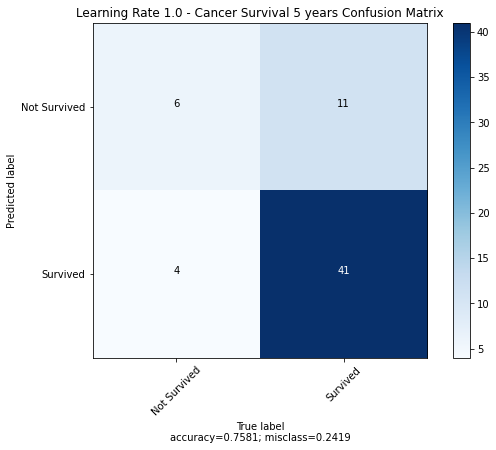

In [12]:
y_test_pred = gbc.predict(X_test)

confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['Not Survived','Survived'],
                      title = 'Learning Rate 1.0 - Cancer Survival 5 years Confusion Matrix',normalize=False)

In [13]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44        17
           1       0.79      0.91      0.85        45

    accuracy                           0.76        62
   macro avg       0.69      0.63      0.64        62
weighted avg       0.74      0.76      0.74        62



In [14]:
gbc3 = GradientBoostingClassifier(learning_rate=0.5,max_depth=5)

gbc3.fit(X_train, y_train)

print("Train score: ",gbc3.score(X_train, y_train))
print("Test score: ",gbc3.score(X_test, y_test))


Train score:  0.9836065573770492
Test score:  0.6774193548387096


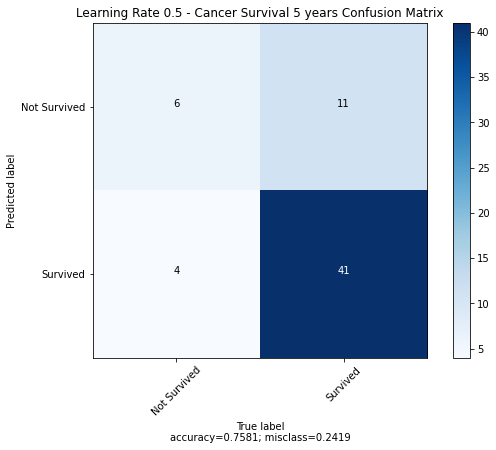

In [15]:
y_test_pred = gbc.predict(X_test)

confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['Not Survived','Survived'],
                      title = 'Learning Rate 0.5 - Cancer Survival 5 years Confusion Matrix',normalize=False)

In [16]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.60      0.35      0.44        17
           1       0.79      0.91      0.85        45

    accuracy                           0.76        62
   macro avg       0.69      0.63      0.64        62
weighted avg       0.74      0.76      0.74        62



The confusuion matrix's are the exact same for different learning rates. But these models with higher learning rates are overfitting a lot worse than the original model and are less accurate. 

Perform a grid search for the optimal learning rate. Instead of accuracy, use a metric that will help your model predict the positive class.

In [103]:
# answer below:
start_time = datetime.now()
param_grid = {'learning_rate': np.arange(.01,1,.01),'n_iter_no_change': [10],'n_estimators':[1000]}

gbc = GradientBoostingClassifier()

gbc_grid = GridSearchCV(gbc, param_grid=param_grid, scoring='f1', cv=5)

gbc_grid.fit(X_train, y_train)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))


Duration: 0:00:08.362559


In [104]:
print("Best learning rate hyperpararmeter: ",gbc_grid.best_estimator_.learning_rate)


Best learning rate hyperpararmeter:  0.04


In [105]:
best_gbc = GradientBoostingClassifier(learning_rate=.04,n_iter_no_change=10,n_estimators=1000)

best_gbc.fit(X_train, y_train)

print("Best Hyperparameters Train score: ",best_gbc.score(X_train, y_train))
print("Best Hyperparameters Test score: ",best_gbc.score(X_test, y_test))

Best Hyperparameters Train score:  0.8401639344262295
Best Hyperparameters Test score:  0.7419354838709677


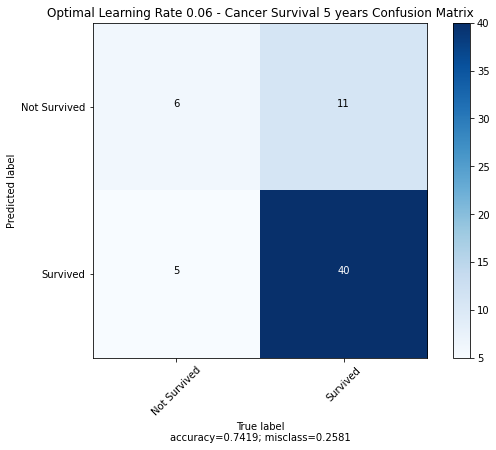

In [106]:
y_test_pred = best_gbc.predict(X_test)

confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['Not Survived','Survived'],
                      title = 'Optimal Learning Rate 0.06 - Cancer Survival 5 years Confusion Matrix',normalize=False)

In [107]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.55      0.35      0.43        17
           1       0.78      0.89      0.83        45

    accuracy                           0.74        62
   macro avg       0.66      0.62      0.63        62
weighted avg       0.72      0.74      0.72        62



Using an optimal learning rate of 0.04 and F1 scoring helped improve the survived class precision. This is .01 better than the other 3 models. We see the most accurate overall score and the least amount of overfitting with this optimized model. 

List the feature importances for the model with the optimal learning rate.

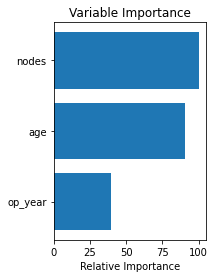

In [108]:
# answer below:
feature_importance = best_gbc.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [77]:
# results with Classes Balanced
from imblearn.combine import SMOTEENN

smote = SMOTEENN(sampling_strategy=1, random_state=21)

X_train_samp, y_train_samp = smote.fit_resample(X_train, y_train)

y_train_samp = pd.Series(y_train_samp, name='TenYearCHD')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [81]:
gbc = GradientBoostingClassifier(learning_rate=.01,max_depth=5)

gbc.fit(X_train_samp, y_train_samp)

print("Train score: ",gbc.score(X_train_samp, y_train_samp))
print("Test score: ",gbc.score(X_test, y_test))

Train score:  0.9681528662420382
Test score:  0.7580645161290323


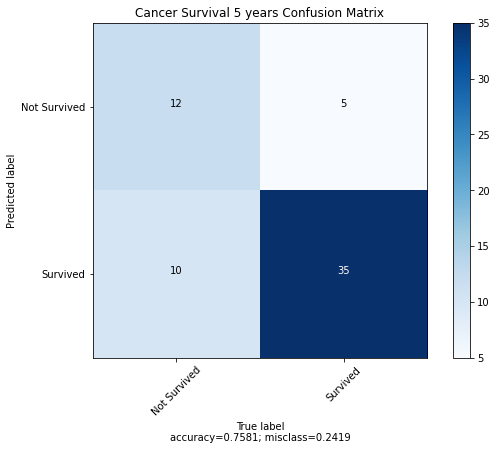

In [82]:
from sklearn.metrics import  classification_report, confusion_matrix
y_test_pred = gbc.predict(X_test)

confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['Not Survived','Survived'],
                      title = 'Cancer Survival 5 years Confusion Matrix',normalize=False)

In [83]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.55      0.71      0.62        17
           1       0.88      0.78      0.82        45

    accuracy                           0.76        62
   macro avg       0.71      0.74      0.72        62
weighted avg       0.78      0.76      0.77        62



Precision actually increase on the dominat class an dropped on the minority class when we balanced sample. This was a bit of a suprise. However, our recall and F1 scores significantly increased for the minortiy class. Overall, accuracy stayed the same and we are overfitting more than our unbalanced model. 

In [102]:
start_time = datetime.now()
param_grid = {'learning_rate': np.arange(.01,1,.01),'n_iter_no_change': [10],'n_estimators':[1000]}

gbc = GradientBoostingClassifier()

gbc_grid = GridSearchCV(gbc, param_grid=param_grid, scoring='accuracy', cv=5)

gbc_grid.fit(X_train_samp, y_train_samp)
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:00:16.550865


In [109]:
print("Best learning rate hyperpararmeter: ",gbc_grid.best_estimator_.learning_rate)

Best learning rate hyperpararmeter:  0.04


In [110]:
best_gbc = GradientBoostingClassifier(learning_rate=.04,n_iter_no_change=10,n_estimators=1000)

best_gbc.fit(X_train_samp, y_train_samp)

print("Best Hyperparameters Train score: ",best_gbc.score(X_train_samp, y_train_samp))
print("Best Hyperparameters Test score: ",best_gbc.score(X_test, y_test))

Best Hyperparameters Train score:  0.9808917197452229
Best Hyperparameters Test score:  0.7741935483870968


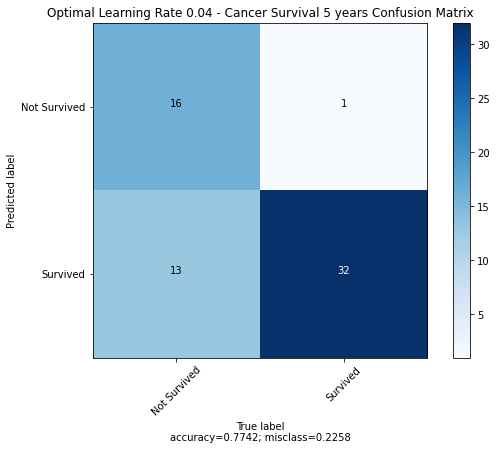

In [113]:
y_test_pred = best_gbc.predict(X_test)

confusion = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm=confusion, target_names=['Not Survived','Survived'],
                      title = 'Optimal Learning Rate 0.04 - Cancer Survival 5 years Confusion Matrix',normalize=False)

In [112]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.55      0.94      0.70        17
           1       0.97      0.71      0.82        45

    accuracy                           0.77        62
   macro avg       0.76      0.83      0.76        62
weighted avg       0.86      0.77      0.79        62



The optimized class balanced model did the best. We see the highest precision for the dominant class. It also had the highest weighted avg precision, recall, and F1 scores of any models. It overfit on the training set more than most models, but the test scores are the most accurate of any model. 